In [5]:
import numpy as np
from matplotlib import pyplot as plt
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
from skimage import io

from config import SAM_PATH

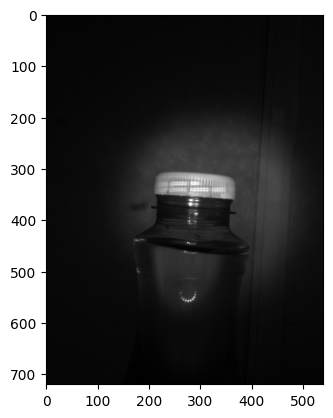

In [6]:
test_img = io.imread('../0006.jpg')
plt.imshow(test_img, cmap='gray')

In [7]:
sam = sam_model_registry["vit_b"](checkpoint=SAM_PATH)

predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [8]:
# transform grayscale to HWC
frame = np.repeat(test_img[:, :, np.newaxis], 3, axis=2)
masks = mask_generator.generate(frame)

(-0.5, 539.5, 719.5, -0.5)

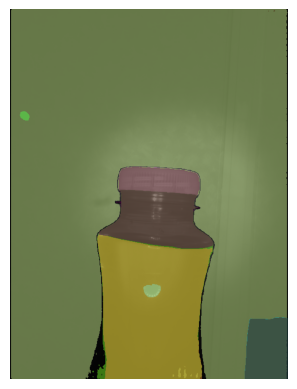

In [9]:
plt.figure()
plt.imshow(frame, cmap='gray')

ax = plt.gca()
ax.set_autoscale_on(False)

polygons = []
color = []

for mask in masks:
    segmentation = mask['segmentation']
    img = np.ones((segmentation.shape[0], segmentation.shape[1], 3))
    color_mask = np.random.random((1, 3)).tolist()[0]

    for i in range(3):
        img[:,:,i] = color_mask[i]

    ax.imshow(np.dstack((img, segmentation*0.5)))

plt.axis("off")